<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/InternshalaML/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feature engineering

extracting more info/signal from the existing data

numerical, categorical, text/string, data-time

types:
1. feature preprocessing : it implies updating / transforming the existing features
2. feature generation : it is creatinf new feature from the exixting data


feature preprocessing: 
 
 types:
 1. transformation : 
      replacing a var by a fun
      log,
      square/cube,
      sqrt/cuberoot,
      reciprocal



#### I .1. Transformation

In [0]:
#importing the lib and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('train_bm.csv')

In [52]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53e5d80080>,
      dtype=object)

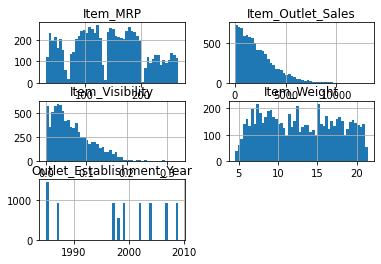

In [53]:
#visualizing all var i the dataset

data[data.columns].hist(bins = 50)

here item_outlet_sales, item_visibility are right skewed

left skewed -- nth power / exponential

right skewed -- sqrt / log(x) / log(x+c) if (x<0)



In [0]:
# sqrt transformation

item_visibility_sqrt = np.sqrt(data['Item_Visibility'])

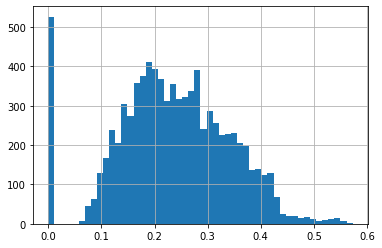

In [55]:
item_visibility_sqrt.hist(bins = 50)

as compared to the previous histogram, now it is normally distributed

In [56]:
# log transformation

item_visibility_log = np.log(data['Item_Visibility'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


here were are getting an warning (divide by zero)

In [57]:
data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

the divide by zero is because, item_visibility has some zero values and log(0) is undefined, so we append it with some constant such that log(0 + c) which will result in value

In [0]:
item_visibility_log = np.log(data['Item_Visibility']+ 0.1)

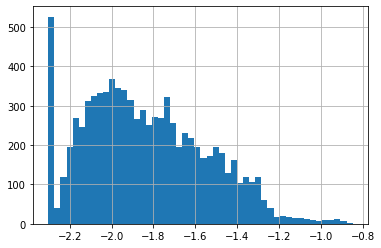

In [59]:
item_visibility_log.hist(bins = 50)

log transformation still, seems to be right skewed when compared with sqrt transfomation

here we can observe negaives, this is because the values in tha column are less than 1. lets increase the scale of the value

note: the increase in scale will  not effect the distribution at all

 

In [0]:
visibility = data['Item_Visibility']*100

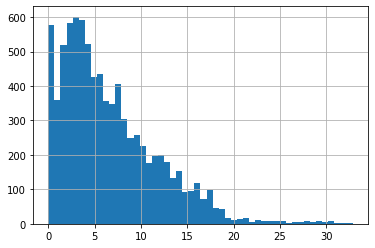

In [61]:
visibility.hist(bins = 50)

In [0]:
log_visibility = np.log(visibility + 1)

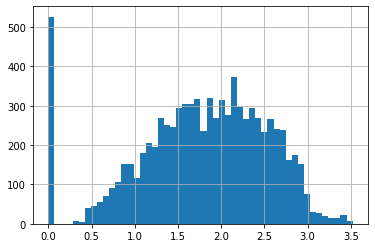

In [63]:
log_visibility.hist(bins = 50)

now the distribution seems symmetric and values are also positive

#### I . 2. Scaling

types:

  a. MinMAx scaling:

  scale downs to [0,1]

   x = x - min() / max() - min()

  b. Standard scaling:

   x = x - mean / SD 


In [64]:
temp = data[['Item_Visibility', 'Item_MRP']]
temp.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


Min Max Scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(temp)
scaled_data = pd.DataFrame(scaled_data, columns = ['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [67]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000


Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp)
scaled_data = pd.DataFrame(scaled_data, columns = ['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220


In [70]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03
mean,1.822365e-16,-1.637654e-16
std,1.000059e+00,1.000059e+00
min,-1.281758e+00,-1.761688e+00
25%,-7.586531e-01,-7.574307e-01
50%,-2.364792e-01,3.243893e-02
75%,5.514755e-01,7.170372e-01
max,5.083050e+00,2.021724e+00


#### I. 3. One Hot Encoding

most ml models doesnt deal with categorical val espicailly sklearn

so we encode them to numeric

categorical variables with order in their values 'ordinals', instead of making different cols for each value in them , will assign numericals to each, this preserve the info of the table

In [71]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
data.shape

(8523, 12)

In [73]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [74]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [75]:
pd.get_dummies(data['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [76]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [77]:
data_encoded.shape

(8523, 1605)

problem 1: 

look at the newly created var outlet_size_high, outlet_size_medium, outlet_size_small. the order btw therse var is destroyed . As a result we are missing out some info 

In [78]:
data_encoded[['Outlet_Size_High','Outlet_Size_Medium', "Outlet_Size_Small"]]

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0
...,...,...,...
8518,1,0,0
8519,0,0,0
8520,0,0,1
8521,0,1,0


problem 2:

the no of features are dratically increased from 12 to 1605

In [79]:
data_encoded.shape

(8523, 1605)

item_identifies has uniques valaues , which inturn create that many uniques var in dataset, and most of them have almost zero which is of no use for modelling

_______________________________________________________________________________________

Solution: problem 1

instead of one hot encoding we'll use label encoder

In [0]:
from sklearn.preprocessing import LabelEncoder

In [81]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [82]:
le = LabelEncoder()
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0])

label encoder uses alphabetical order

other way to assign is using .map function

In [0]:
data['Outlet_Size'] = data['Outlet_Size'].map({'Small':0,
                                               'Medium':1,
                                               'High':2})

Solution: problem 2

combing sparses classes

  .so first find out all the uniques values in resprective columns
  cosider the max one, if it gets encoded turns out to be a massive

  .cal the value counts of that particular var, so that we'll ge to know about the max and min value of it, so that we avoid the less frequent one(min one)

  .  







In [84]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [85]:
temp = data['Item_Identifier'].value_counts()
temp.head()

FDG33    10
FDW13    10
FDX04     9
NCQ06     9
FDO19     9
Name: Item_Identifier, dtype: int64

In [86]:
data['Item_Identifier_count'] = data['Item_Identifier'].apply(lambda x: temp[x])
data[['Item_Identifier', 'Item_Identifier_count']].head()

,Item_Identifier,Item_Identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [87]:
for i in range(len(data)):
  if data['Item_Identifier_count'][i] < 4:
    data['Item_Identifier'][i] = 'other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_count
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,6


In [89]:
 data['Item_Identifier'].value_counts()

other    418
FDG33     10
FDW13     10
FDF52      9
NCQ06      9
        ... 
FDG40      4
FDQ55      4
NCP53      4
NCW17      4
NCY54      4
Name: Item_Identifier, Length: 1403, dtype: int64

#### II. 1. Binning 


feature generation is creating new features from the existing data

In [90]:
data1 = pd.read_csv('stroke prediction.csv')
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [0]:
# creating bins

bins = [0, 12, 19, 30, 60, 90]
group = ['child', 'teenager', 'audlt', 'middle_aged', 'senior']
data1['age_category'] = pd.cut(data1['age'], bins, labels= group) 

In [92]:
data1[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior
4,14.0,teenager


#### feature interaction

using two/more var to predict

In [93]:
data3 = pd.read_csv('train_loan.csv')
data3.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
data3['total_income'] = data3['ApplicantIncome'] + data3['CoapplicantIncome']
data3[['ApplicantIncome', 'CoapplicantIncome', 'total_income']].head()

,ApplicantIncome,CoapplicantIncome,total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


In [97]:
data3['loan_income_ratio'] = data3['LoanAmount'] / data3['ApplicantIncome']
data3[['LoanAmount', 'ApplicantIncome', 'loan_income_ratio']].head()

,LoanAmount,ApplicantIncome,loan_income_ratio
0,NaN,5849,NaN
1,128.0,4583,0.027929
2,66.0,3000,0.022000
3,120.0,2583,0.046458
4,141.0,6000,0.023500


Missing values

In [100]:
data4 = pd.read_csv('stroke prediction.csv')
data4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [101]:
data4.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [0]:
data4['smoking_status_NA'] = data4['smoking_status'].isnull() *1

In [104]:
data4[['smoking_status_NA', 'smoking_status' ]].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


frequency encoding

In [105]:
temp = data['Item_Type'].value_counts()
temp.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

In [107]:
data['Item_Type_count'] = data['Item_Type'].apply(lambda x: temp[x])
data[['Item_Identifier', 'Item_Type', 'Item_Type_count']].head()

,Item_Identifier,Item_Type,Item_Type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


mean encoding(using target var)

In [108]:
data[['Item_Type', 'Item_Outlet_Sales']].head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [109]:
data.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

# Feature Eng on Data-Time features



In [110]:
df =pd.read_csv('No2 dataset.csv')
df.shape

(4737, 2)

In [111]:
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [112]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

here the datatype of data_time is deafulty taken as an object , firstly we need to change it to respective type

In [114]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format = '%d/%m/%Y %H.%M.%S')
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

In [115]:
df['Date_Time'].max(), df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

In [116]:
df['Date_Time'].tail

<bound method NDFrame.tail of 0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
4732   2004-09-23 22:00:00
4733   2004-09-23 23:00:00
4734   2004-09-24 00:00:00
4735   2004-09-24 01:00:00
4736   2004-09-24 02:00:00
Name: Date_Time, Length: 4737, dtype: datetime64[ns]>

extract hour and  minute

In [117]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int64

In [118]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int64

day of the week mon-0, sun-6

In [119]:
df['Date_Time'].dt.dayofweek.head()

0    2
1    2
2    2
3    2
4    2
Name: Date_Time, dtype: int64

In [123]:
df['Date_Time'].dt.weekday_name

AttributeError: ignored

month from the data

In [124]:
df['Date_Time'].dt.month.head()

0    3
1    3
2    3
3    3
4    3
Name: Date_Time, dtype: int64

In [125]:
df['Date_Time'].dt.is_month_end.head()

0    False
1    False
2    False
3    False
4    False
Name: Date_Time, dtype: bool

In [126]:
new_df = pd.DataFrame( {'year': df['Date_Time'].dt.year,
                        'month':df['Date_Time'].dt.month,
                        'hour':df['Date_Time'].dt.hour,
                        'dayofyear':df['Date_Time'].dt.dayofyear,
                        'week':df['Date_Time'].dt.week,
                        'dayofweek':df['Date_Time'].dt.dayofweek,
                        'quater':df['Date_Time'].dt.quarter
                        })
new_df.head()

,year,month,hour,dayofyear,week,dayofweek,quater
0,2004,3,18,70,11,2,1
1,2004,3,19,70,11,2,1
2,2004,3,20,70,11,2,1
3,2004,3,21,70,11,2,1
4,2004,3,22,70,11,2,1


In [127]:
complete_data = pd.concat([df, new_df], axis=1)
complete_data.head()

,Date_Time,NO2(GT),year,month,hour,dayofyear,week,dayofweek,quater
0,2004-03-10 18:00:00,166,2004,3,18,70,11,2,1
1,2004-03-10 19:00:00,1174,2004,3,19,70,11,2,1
2,2004-03-10 20:00:00,131,2004,3,20,70,11,2,1
3,2004-03-10 21:00:00,172,2004,3,21,70,11,2,1
4,2004-03-10 22:00:00,131,2004,3,22,70,11,2,1


In [129]:
complete_data['is_weekday'] = 0

for i in range(0, len(complete_data)):
  if((complete_data['dayofweek'][i] == 5) | (complete_data['dayofweek'][i] == 6)):
    complete_data['is_weekday'][i] = 0
  else:
    complete_data['is_weekday'][i] = 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [130]:
complete_data[['dayofweek', 'is_weekday']].head()

,dayofweek,is_weekday
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


difference btw two datasets

_______________________________________________________________________________________________________________________

# Automated Feature Engineering


featuretool:

*   entities: a table or dataframe
*   feature primitives: (transformation/ aggregations)
*   Deep feature synthesis :(no domain understanding)










In [0]:
import featuretools as ft

In [139]:
data = pd.read_csv('train_bm.csv')
data.shape

(8523, 12)

In [140]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
x = data.drop(['Item_Outlet_Sales'], axis =1)
y = data['Item_Outlet_Sales']

make an entityset and add the entity

In [142]:
es = ft.EntitySet(id = 'bigmart')
es

Entityset: bigmart
  Entities:
  Relationships:
    No relationships

adding data to entityset created

In [143]:
es.entity_from_dataframe(entity_id='data0', dataframe=x, make_index =True, index='index')
es

Entityset: bigmart
  Entities:
    data0 [Rows: 8523, Columns: 12]
  Relationships:
    No relationships

feature engineering

In [144]:
# run deep feature synthesis with transformation primitives

feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity ='data0', max_depth =1, trans_primitives = ['add_numeric', 'multiply_numeric'])
feature_matrix.head() 

ValueError: ignored

In [155]:
ft.primitives.list_primitives()

,name,type,description
0,all,aggregation,Test if all values are 'True'.
1,median,aggregation,Finds the median value of any feature with wel...
2,min,aggregation,Finds the minimum non-null value of a numeric ...
3,num_unique,aggregation,Returns the number of unique categorical varia...
4,avg_time_between,aggregation,Computes the average time between consecutive ...
...,...,...,...
57,week,transform,Transform a Datetime feature into the week.
58,cum_sum,transform,Calculates the sum of previous values of an in...
59,days,transform,Transform a Timedelta feature into the number ...
60,time_since,transform,Calculates time since the cutoff time.
